In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import geohash as geo

In [52]:
# %matplotlib notebook
%matplotlib inline

In [51]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 7,7

In [4]:
df = pd.read_csv('data/traffic-management.zip', compression='zip')

In [5]:
df.shape

(4206321, 4)

In [6]:
df.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [7]:
df['hour'] = df.timestamp.str.split(':').map(lambda x: x[0]).astype(np.int)
df['minute'] = df.timestamp.str.split(':').map(lambda x: x[1]).astype(np.int)

In [8]:
df_sample = df.sample(frac=0.2)

<IPython.core.display.Javascript object>


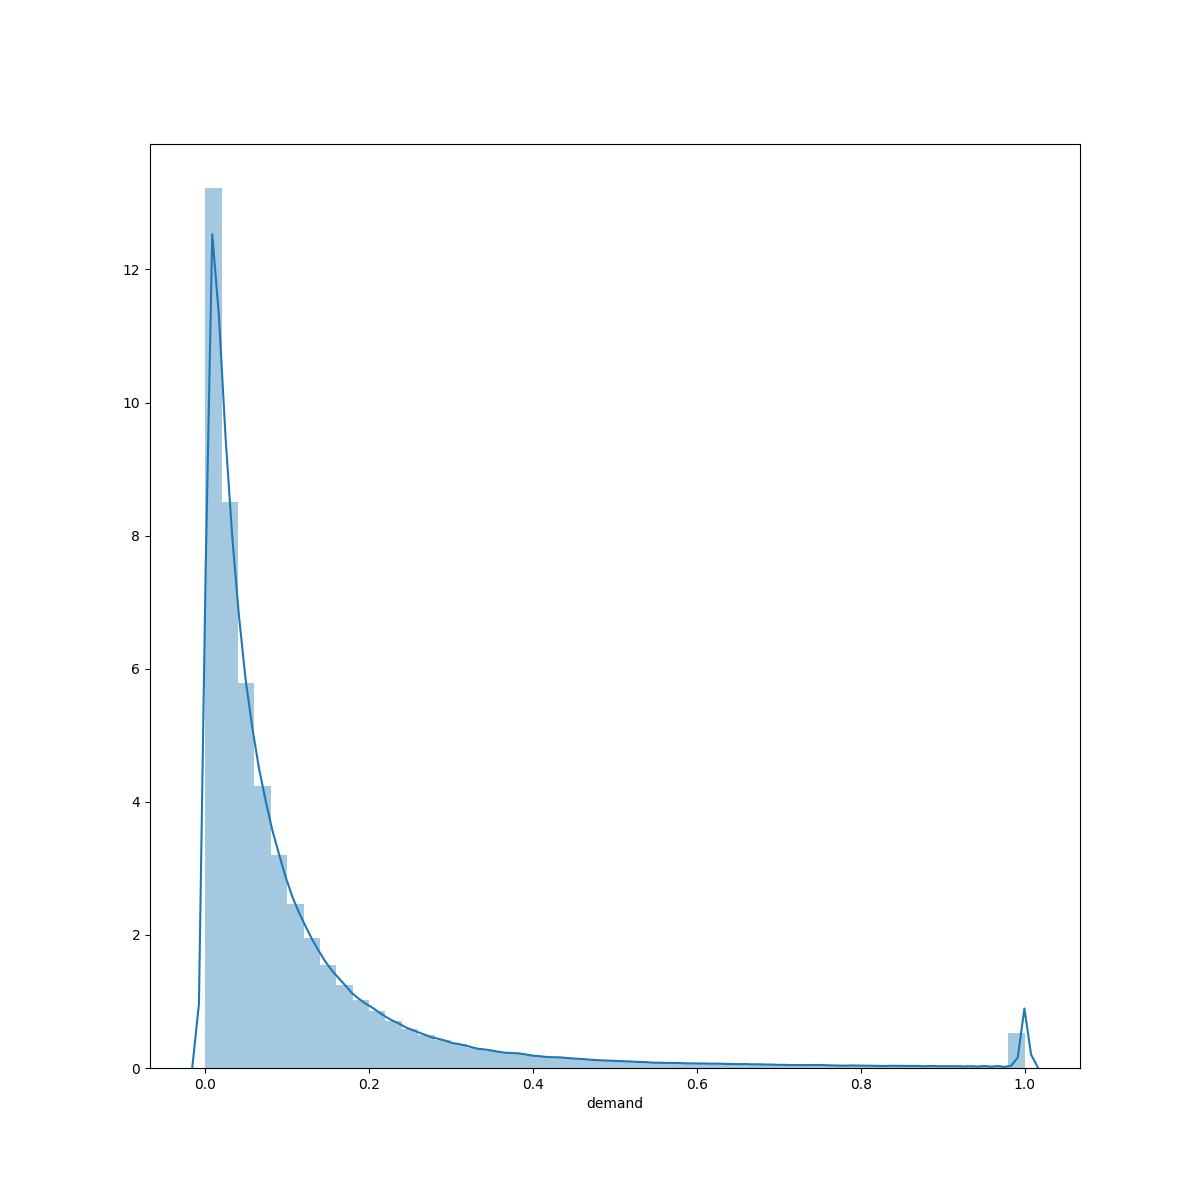

In [9]:
sns.distplot(df_sample.demand)
plt.show()

In [10]:
np.sort(df_sample.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [11]:
np.sort(df_sample.hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
np.sort(df_sample.minute.unique())

array([ 0, 15, 30, 45])

In [13]:
df_sample.geohash6.unique().shape

(1316,)

<IPython.core.display.Javascript object>


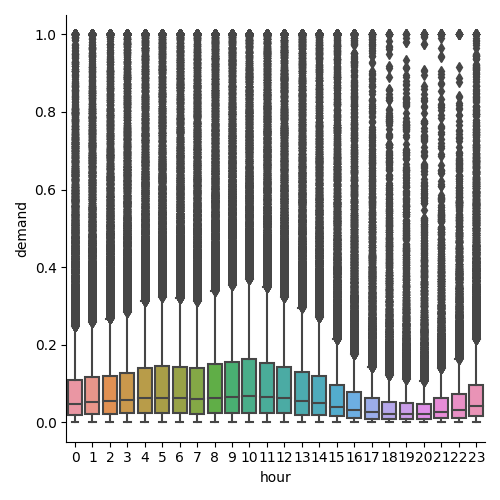

In [14]:

sns.catplot(
    x='hour',
    y='demand',
    data=df_sample,
    kind='box',
)


In [17]:
df_sample_agg_geo = df_sample.groupby(df_sample.geohash6).agg(['sum', 'mean', 'median'])

In [18]:
df_sample_agg_geo.columns = ['{}_{}'.format(a,b) for a,b in df_sample_agg_geo.columns]

In [19]:
df_sample_agg_geo = df_sample_agg_geo.reset_index()

In [20]:
df_sample_agg_geo.head()

,geohash6,day_sum,day_mean,day_median,demand_sum,demand_mean,demand_median,hour_sum,hour_mean,hour_median,minute_sum,minute_mean,minute_median
0,qp02yc,4192,36.452174,39.0,2.442980,0.021243,0.016552,719,6.252174,5.0,2430,21.130435,15.0
1,qp02yf,796,36.181818,41.0,0.199942,0.009088,0.006249,149,6.772727,7.5,465,21.136364,15.0
2,qp02yu,59,59.000000,59.0,0.041504,0.041504,0.041504,15,15.000000,15.0,15,15.000000,15.0
3,qp02yv,31,31.000000,31.0,0.142536,0.142536,0.142536,8,8.000000,8.0,15,15.000000,15.0
4,qp02yy,680,28.333333,29.0,0.437045,0.018210,0.011634,136,5.666667,6.0,555,23.125000,22.5


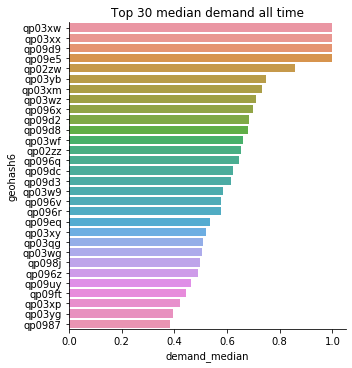

In [53]:
df_sample_top_med_demand = df_sample_agg_geo.sort_values(by='demand_median', ascending=False).iloc[:30]
sns.catplot(
    x='demand_median',
    y='geohash6',
    data=df_sample_top_med_demand,
    kind='bar'
)
plt.title('Top 30 median demand all time')
plt.show()

In [26]:
import Geohash as geo

In [27]:
df_sample_agg_geo['lat'] = df_sample_agg_geo.geohash6.map(lambda x: geo.decode(x)[0])
df_sample_agg_geo['long'] = df_sample_agg_geo.geohash6.map(lambda x: geo.decode(x)[1])

In [48]:
# f, ax = plt.subplots(figsize=(12, 12))
plt.scatter(
    df_sample_agg_geo['lat'] ,
    df_sample_agg_geo['long']
)
plt.show()

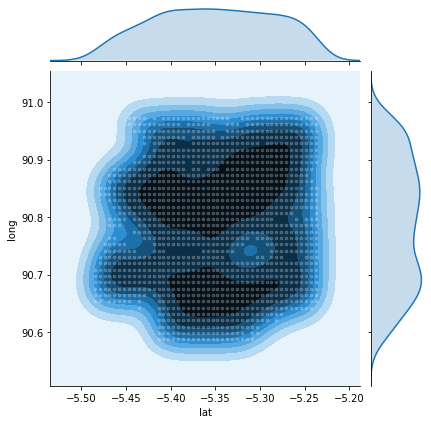

In [57]:

g = sns.jointplot(
    df_sample_agg_geo.lat,
    df_sample_agg_geo.long,
#     ax=ax,
    kind='kde'
#     cmap='Reds',
#     shade=True,
#     shade_lowest=False
)
g.plot_joint(plt.scatter, c='w', alpha=0.2,s=30, linewidth=1, marker='.')

plt.show()

In [50]:
sns.distplot(df_sample_agg_geo.demand_median)
plt.show()

In [58]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [38]:
df_sample_agg_geo.head()

,geohash6,day_sum,day_mean,day_median,demand_sum,demand_mean,demand_median,hour_sum,hour_mean,hour_median,minute_sum,minute_mean,minute_median,lat,long
0,qp02yc,4192,36.452174,39.0,2.442980,0.021243,0.016552,719,6.252174,5.0,2430,21.130435,15.0,-5.484924,90.653687
1,qp02yf,796,36.181818,41.0,0.199942,0.009088,0.006249,149,6.772727,7.5,465,21.136364,15.0,-5.479431,90.653687
2,qp02yu,59,59.000000,59.0,0.041504,0.041504,0.041504,15,15.000000,15.0,15,15.000000,15.0,-5.468445,90.653687
3,qp02yv,31,31.000000,31.0,0.142536,0.142536,0.142536,8,8.000000,8.0,15,15.000000,15.0,-5.462952,90.653687
4,qp02yy,680,28.333333,29.0,0.437045,0.018210,0.011634,136,5.666667,6.0,555,23.125000,22.5,-5.457458,90.653687


In [115]:
random_seed = 1
cluster_features = [
    'lat',
    'long'
]
np.random.seed(random_seed)
cluster_mdl = KMeans(2)
cluster_mdl.fit(df_sample_agg_geo[cluster_features])
crowd_center_cluster = cluster_mdl.predict(df_sample_agg_geo[cluster_features])

In [140]:
cluster_mdl.cluster_centers_[crowd_center_cluster[0]]

array([-5.35648648, 90.69175543])

In [145]:
df_sample_agg_geo['geo_region_cluster'] = crowd_center_cluster
geo_region_cluster_mid_points = np.array(list(
    map(lambda x: cluster_mdl.cluster_centers_[x], crowd_center_cluster)
))
df_sample_agg_geo['geo_region_cluster_mid_point_lat'] = geo_region_cluster_mid_points[:, 0]
df_sample_agg_geo['geo_region_cluster_mid_point_long'] = geo_region_cluster_mid_points[:, 1]

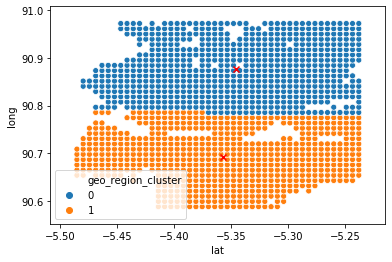

In [121]:
sns.scatterplot(
    x='lat',
    y='long',
    hue='geo_region_cluster',
    data=df_sample_agg_geo
)

plt.scatter(
    *cluster_mdl.cluster_centers_.T[:2],
    marker='x',
    color='red'
)
plt.show()

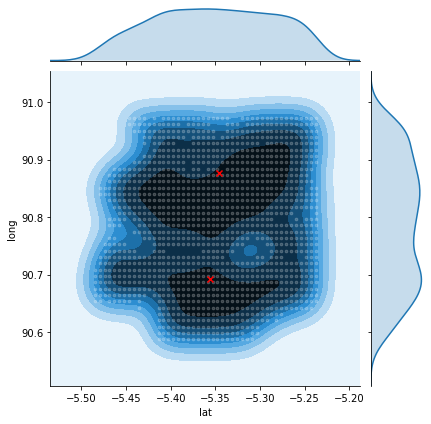

In [118]:

g = sns.jointplot(
    df_sample_agg_geo.lat,
    df_sample_agg_geo.long,
    kind='kde'
)
g.plot_joint(plt.scatter, c='w', alpha=0.2,s=30, linewidth=1, marker='.')
plt.scatter(
    *cluster_mdl.cluster_centers_.T[:2],
    marker='x',
    color='red'
)


plt.show()

with this clustering we can generate center of city features

In [119]:
from sklearn.neighbors import DistanceMetric

In [123]:
dist = DistanceMetric.get_metric('haversine')

In [168]:
dist.pairwise(np.radians([
    [-5.484924, 90.653687],
    [-5.356486,90.691755]
]))[1][0] * 6371000/1000

14.890391221558906

In [169]:
df_sample_agg_geo['dist_to_center_km'] = df_sample_agg_geo[['lat', 'long', 'geo_region_cluster_mid_point_lat', 'geo_region_cluster_mid_point_long']].apply(
    lambda x: (dist.pairwise(np.radians([
        [x['lat'], x['long']],
        [x['geo_region_cluster_mid_point_lat'], x['geo_region_cluster_mid_point_long']]
    ])) * 6371)[1][0],
    axis=1
)

In [170]:
df_sample_agg_geo[[
    'lat',
    'long',
    'geo_region_cluster_mid_point_lat',
    'geo_region_cluster_mid_point_long',
    'dist_to_center_km'
]].head()

,lat,long,geo_region_cluster_mid_point_lat,geo_region_cluster_mid_point_long,dist_to_center_km
0,-5.484924,90.653687,-5.356486,90.691755,14.890403
1,-5.479431,90.653687,-5.356486,90.691755,14.305613
2,-5.468445,90.653687,-5.356486,90.691755,13.143136
3,-5.462952,90.653687,-5.356486,90.691755,12.566107
4,-5.457458,90.653687,-5.356486,90.691755,11.992424


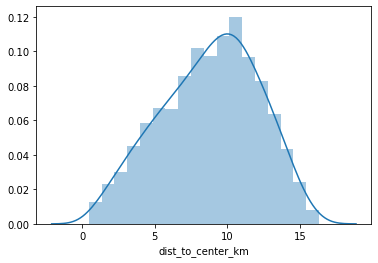

In [171]:
sns.distplot(df_sample_agg_geo['dist_to_center_km'])
plt.show()

In [173]:
from util import *

Using TensorFlow backend.


In [229]:
df_train = get_train_data(df, n_days=60)

In [230]:
df_train.head()

,geohash6,day,timestamp,demand,hour,minute
0,qp03wc,18,20:0,0.020072,20,0
1,qp03pn,10,14:30,0.024721,14,30
2,qp09sw,9,6:15,0.102821,6,15
3,qp0991,32,5:0,0.088755,5,0
4,qp090q,15,4:0,0.074468,4,0


In [236]:
_d = df_train
_d = _d.groupby(['geohash6','day']).agg('mean').reset_index()
_d = _d.groupby(['day']).agg('mean').reset_index()


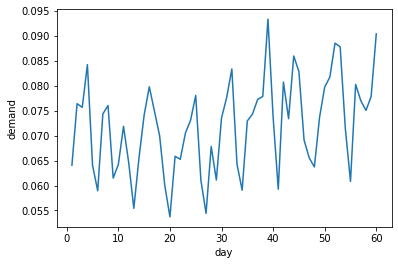

In [237]:
sns.lineplot(
    x='day',
    y='demand',
    data=_d
)
plt.show()

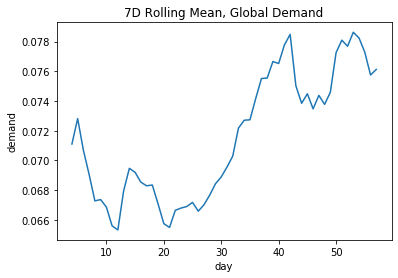

In [253]:
plt.title('7D Rolling Mean, Global Demand')
sns.lineplot(
    x='day',
    y='demand',
    data=_d.rolling(7).mean()
)
plt.show()

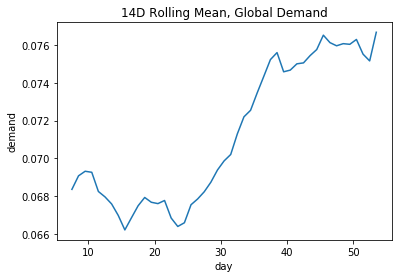

In [255]:
plt.title('14D Rolling Mean, Global Demand')
sns.lineplot(
    x='day',
    y='demand',
    data=_d.rolling(14).mean()
)
plt.show()

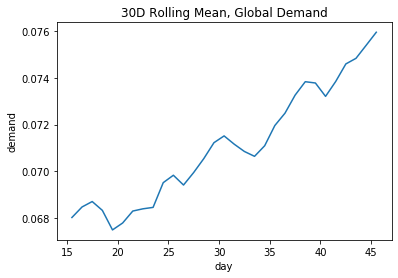

In [254]:
plt.title('30D Rolling Mean, Global Demand')
sns.lineplot(
    x='day',
    y='demand',
    data=_d.rolling(30).mean()
)
plt.show()

Globally, mean of demand is increasing and could only be observed by  

In [25]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


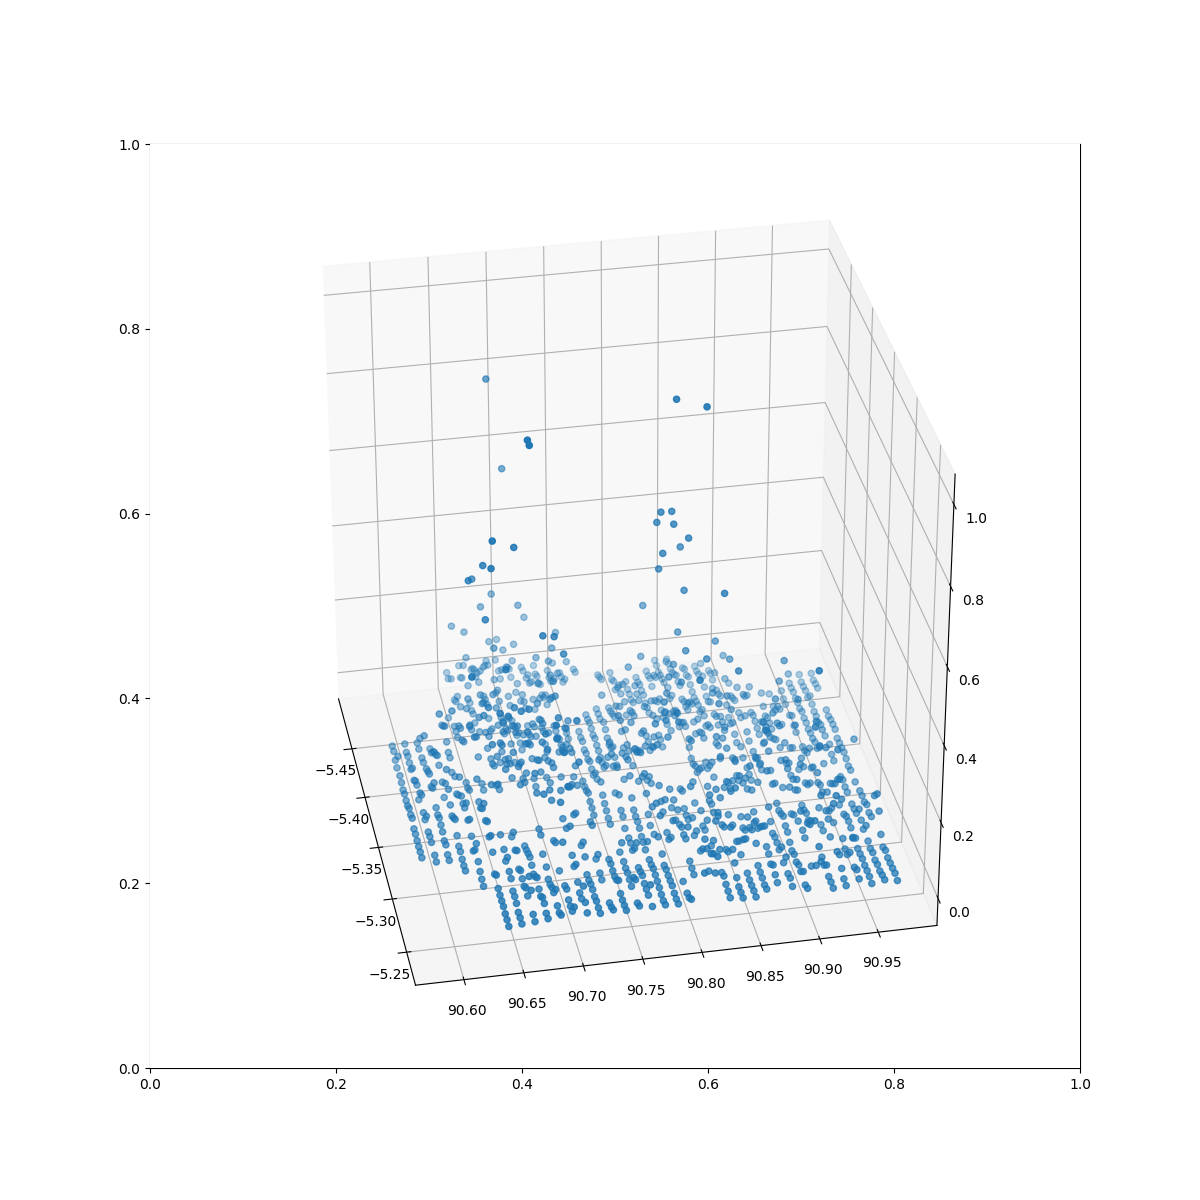

In [26]:
f, ax = plt.subplots(figsize=(12,12))
ax = f.add_subplot(111, projection='3d')

ax.scatter(
    df_sample_agg_geo.lat,
    df_sample_agg_geo.long,
    df_sample_agg_geo.demand_median 
)

<IPython.core.display.Javascript object>


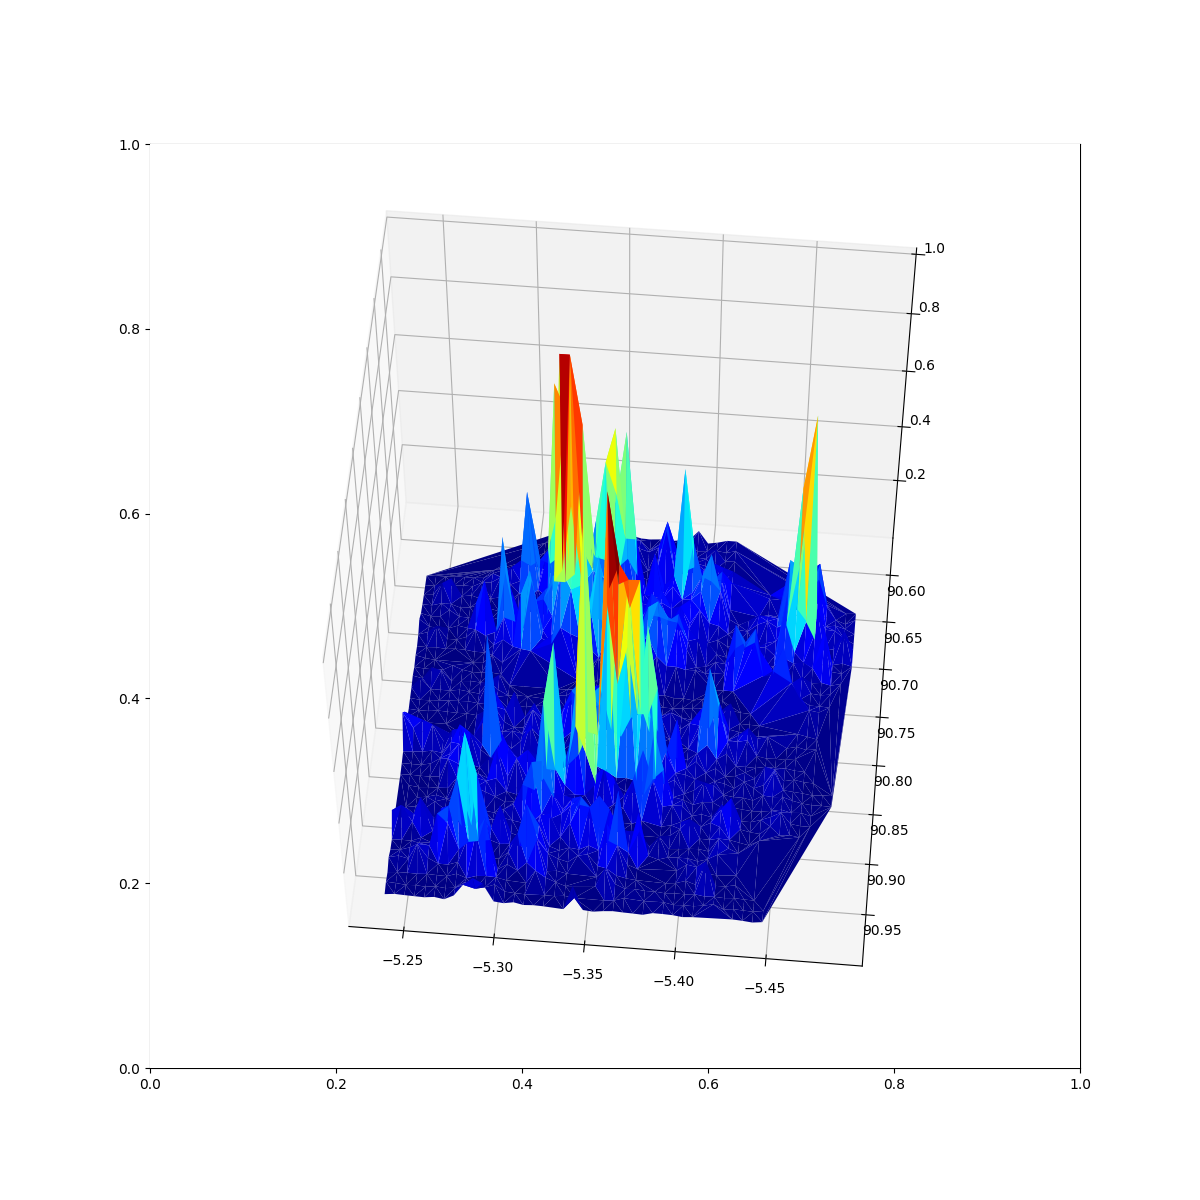

In [27]:
f, ax = plt.subplots(figsize=(12,12))
ax = f.add_subplot(111, projection='3d')

ax.plot_trisurf(
    df_sample_agg_geo.lat,
    df_sample_agg_geo.long,
    df_sample_agg_geo.demand_median,
    cmap='jet'
)
plt.title('')
plt.show()

which time is the median?

In [28]:
df_sample_fulfilled_median = df_sample.merge(
    df_sample_agg_geo,
    how='inner',
    left_on=['geohash6', 'demand'],
    right_on=['geohash6', 'demand_median']
)

<IPython.core.display.Javascript object>


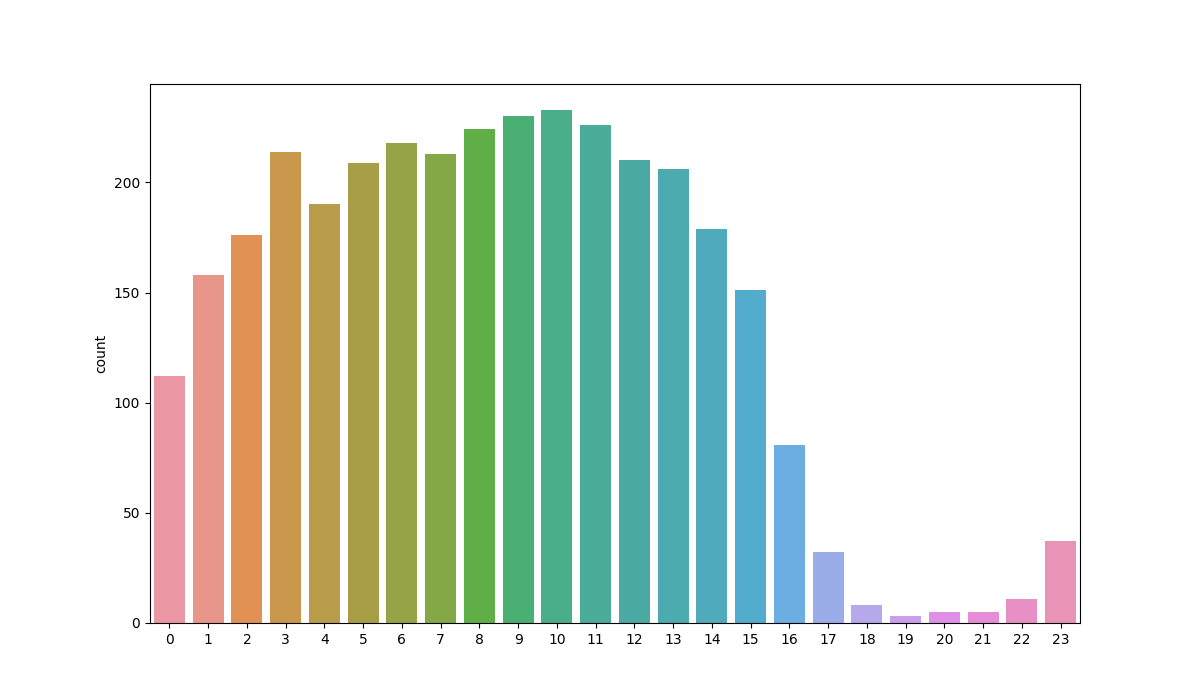

In [29]:
f, ax = plt.subplots(figsize=(12, 7))
sns.countplot(
    df_sample_fulfilled_median.hour.values
)
plt.show()

<IPython.core.display.Javascript object>


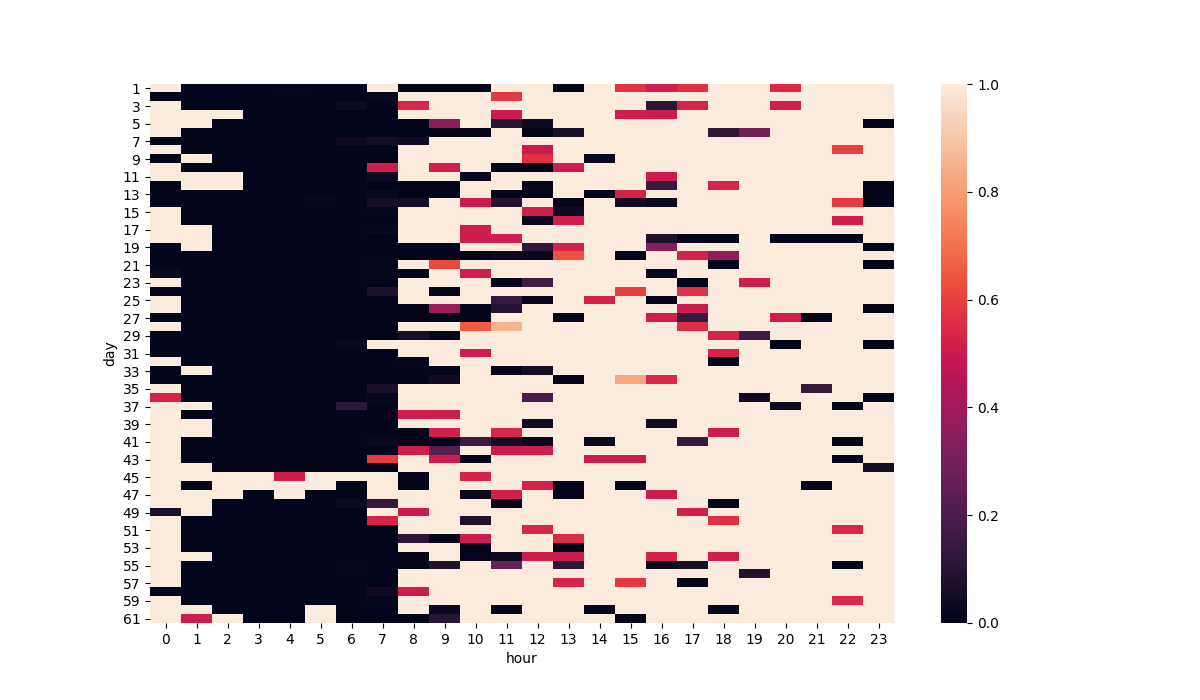

In [30]:
f, ax = plt.subplots(figsize=(12, 7))
_d = df_sample_fulfilled_median.groupby(['day', 'hour']).agg('median').reset_index()
_d.hour = (_d.hour + 8) % 24
sns.heatmap(
    _d.pivot(
        index='day',
        columns='hour',
        values='demand'
    ).fillna(0),
    ax=ax
)
plt.show()

<IPython.core.display.Javascript object>


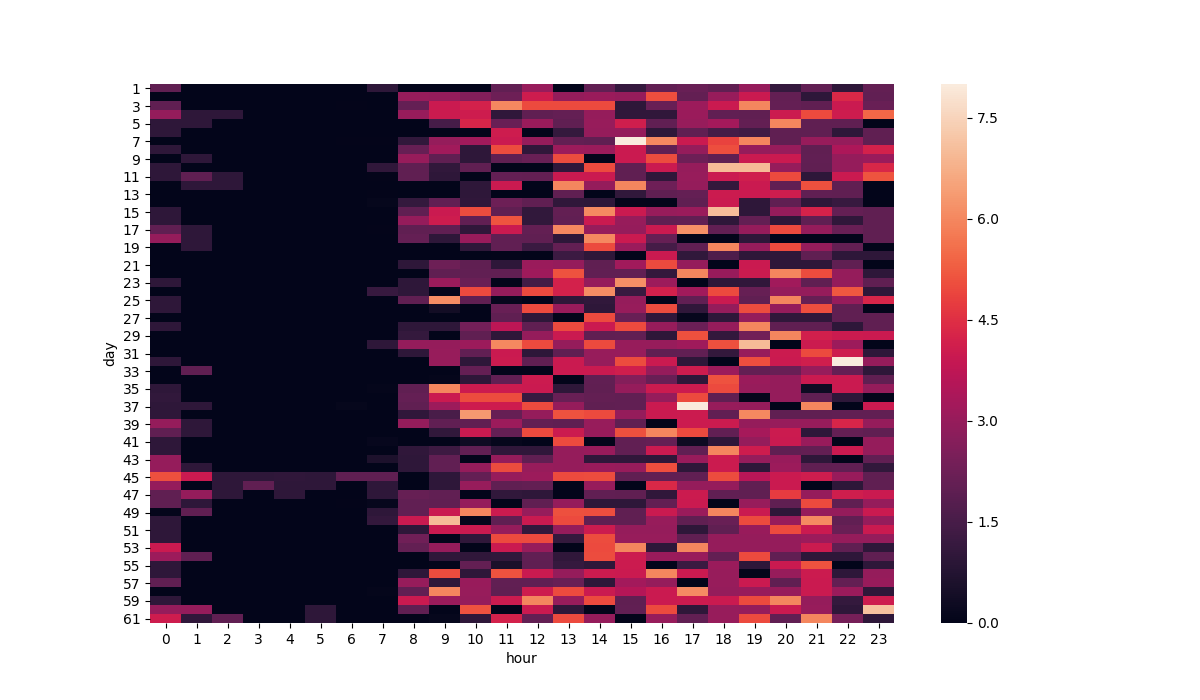

In [31]:
f, ax = plt.subplots(figsize=(12, 7))
_d = df_sample_fulfilled_median.groupby(['day', 'hour']).agg('sum').reset_index()
_d.hour = (_d.hour + 8) % 24
sns.heatmap(
    _d.pivot(
        index='day',
        columns='hour',
        values='demand'
    ).fillna(0),
    ax=ax
)
plt.show()

<IPython.core.display.Javascript object>


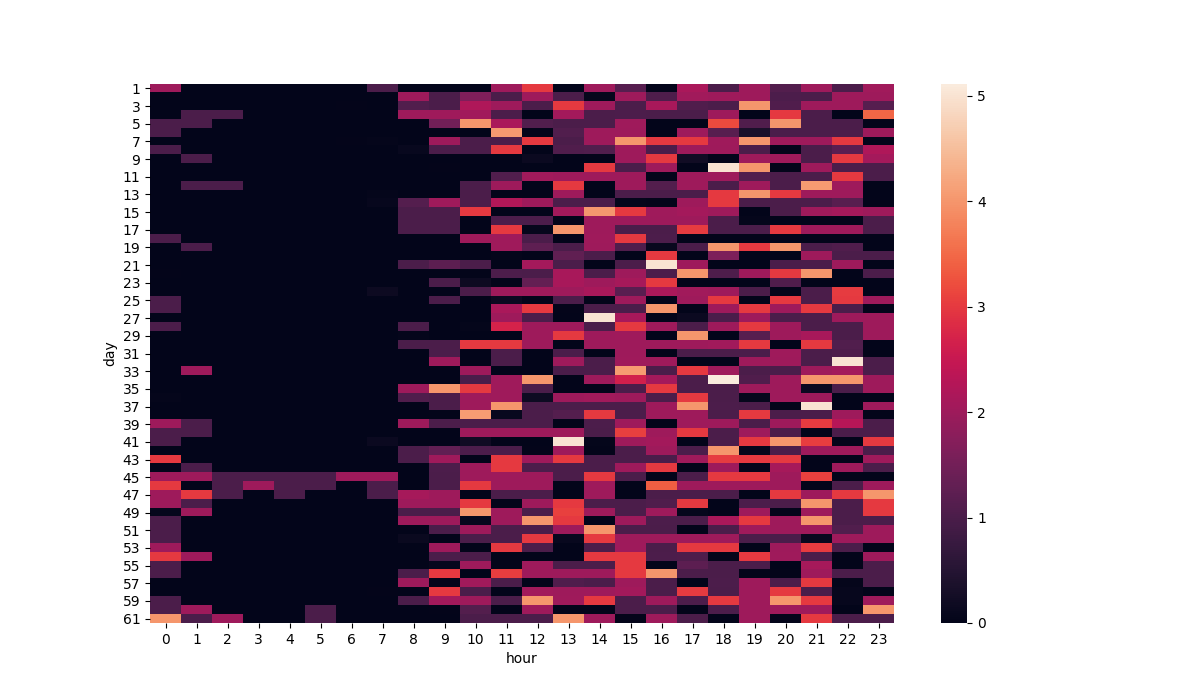

In [35]:
f, ax = plt.subplots(figsize=(12, 7))
_d = df_sample_fulfilled_median[
    df_sample_fulfilled_median.long > 90.73
].groupby(['day', 'hour']).agg('sum').reset_index()
_d.hour = (_d.hour + 8) % 24
sns.heatmap(
    _d.pivot(
        index='day',
        columns='hour',
        values='demand'
    ).fillna(0),
    ax=ax
)
plt.show()

<IPython.core.display.Javascript object>


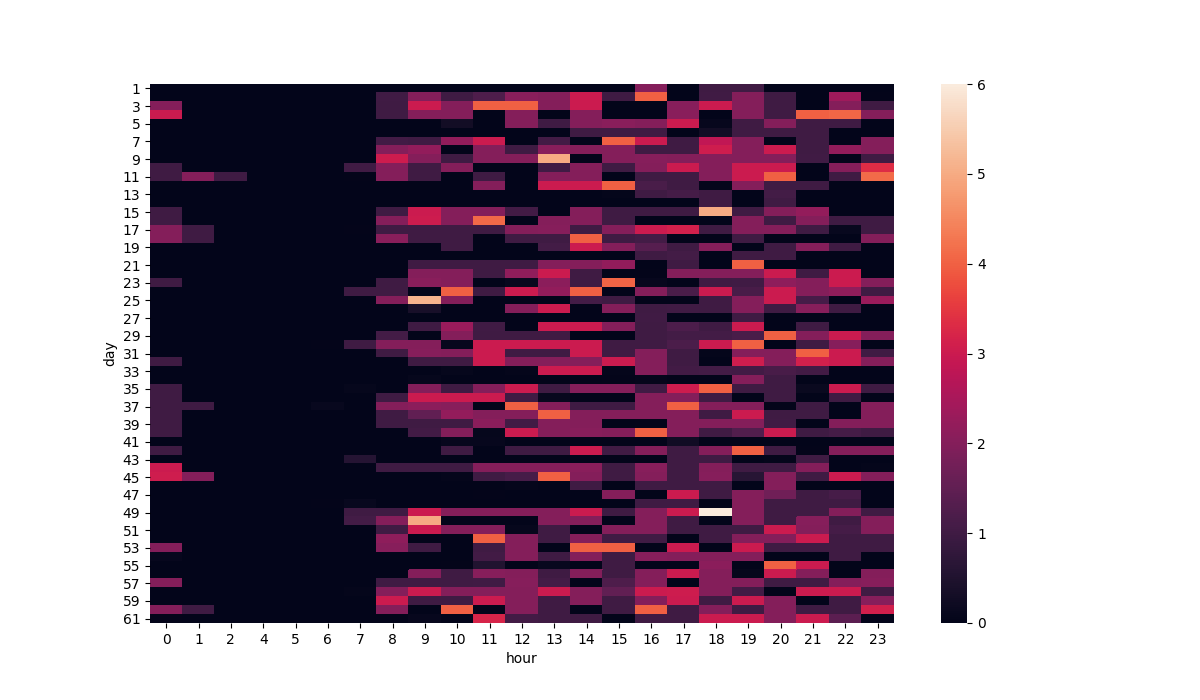

In [32]:
f, ax = plt.subplots(figsize=(12, 7))
_d = df_sample_fulfilled_median[
    df_sample_fulfilled_median.long < 90.73
].groupby(['day', 'hour']).agg('sum').reset_index()
_d.hour = (_d.hour + 8) % 24
sns.heatmap(
    _d.pivot(
        index='day',
        columns='hour',
        values='demand'
    ).fillna(0),
    ax=ax
)
plt.show()

at this specific region, it seems that day  5-6, 12-13, shows similar pattern: demand does not getting up until noon. This might happen on the rural area. For now we can assume that 5-6 and so on is weekend

In [36]:
_d['is_weekend'] = _d.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
_d['dow'] = _d.day.map(lambda x: (max(x, 0) - 6) % 7)

<IPython.core.display.Javascript object>


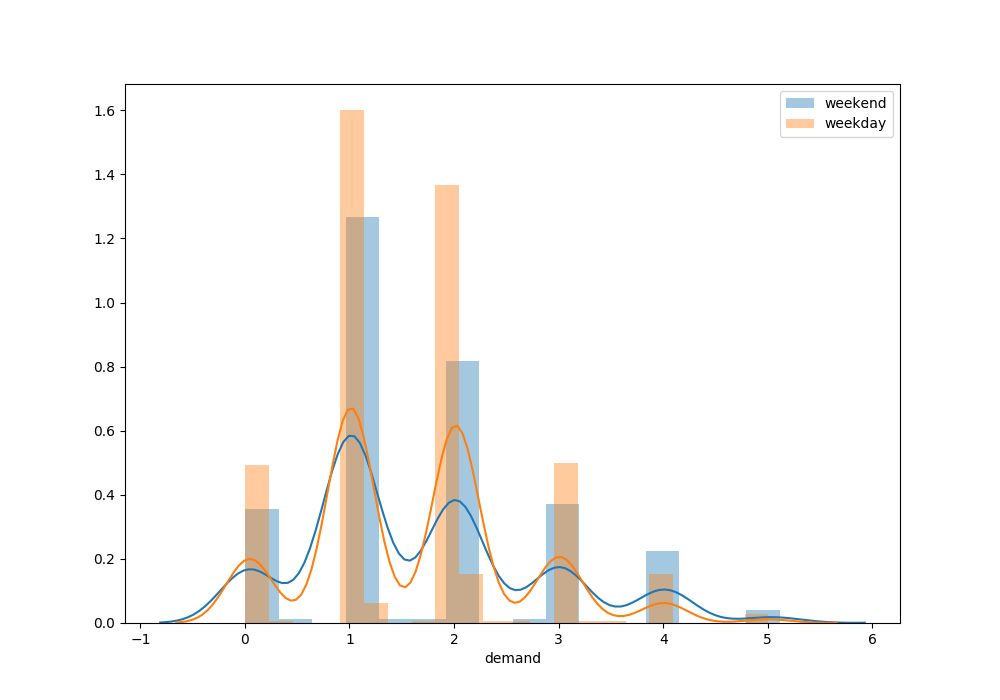

In [37]:
f, ax = plt.subplots(figsize=(10, 7))
sns.distplot(
    _d[
        _d.is_weekend
    ].demand,
    label='weekend'
)
sns.distplot(
    _d[
        ~_d.is_weekend
    ].demand,
    label='weekday'
)
plt.legend()
plt.show()

It seems this certain area receive less traffic in weekend, as we could see the density on 0 side is higher on weekend, while density at 1, 2, 3 is lower than weekday. 

It is interesting to also see that the total sum on each day category surrounded in each integers.

<IPython.core.display.Javascript object>


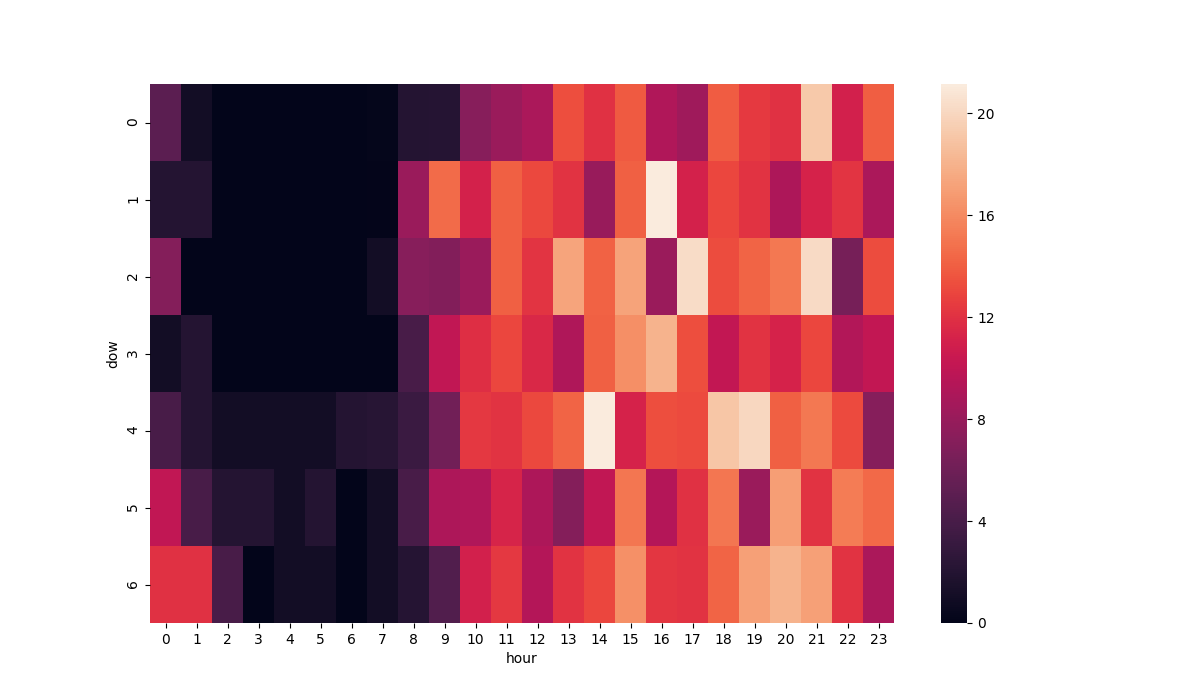

In [42]:
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(
    _d.groupby(['dow', 'hour']).agg('sum').reset_index().pivot(
        index='dow',
        columns='hour',
        values='demand'
    ).fillna(0),
    ax=ax
)
plt.show()

In [44]:
from sklearn.mixture import GaussianMixture

In [48]:
df_sample['lat'] = df_sample.geohash6.map(lambda x: geo.decode(x)[0])
df_sample['long'] = df_sample.geohash6.map(lambda x: geo.decode(x)[1])

In [49]:
features = ['lat', 'long', 'demand']
mdl = GaussianMixture(3)
clusters = mdl.fit_predict(df_sample[features])


In [65]:
pred_prob = mdl.predict_proba(df_sample[features])

In [70]:
df_sample['cluster'] = clusters
df_sample['cluster_prob'] = np.apply_along_axis(lambda x: np.max(x), 1, pred_prob)

In [62]:
_d = df_sample.groupby(['lat', 'long'] + ['cluster']).agg('median').reset_index()

<IPython.core.display.Javascript object>


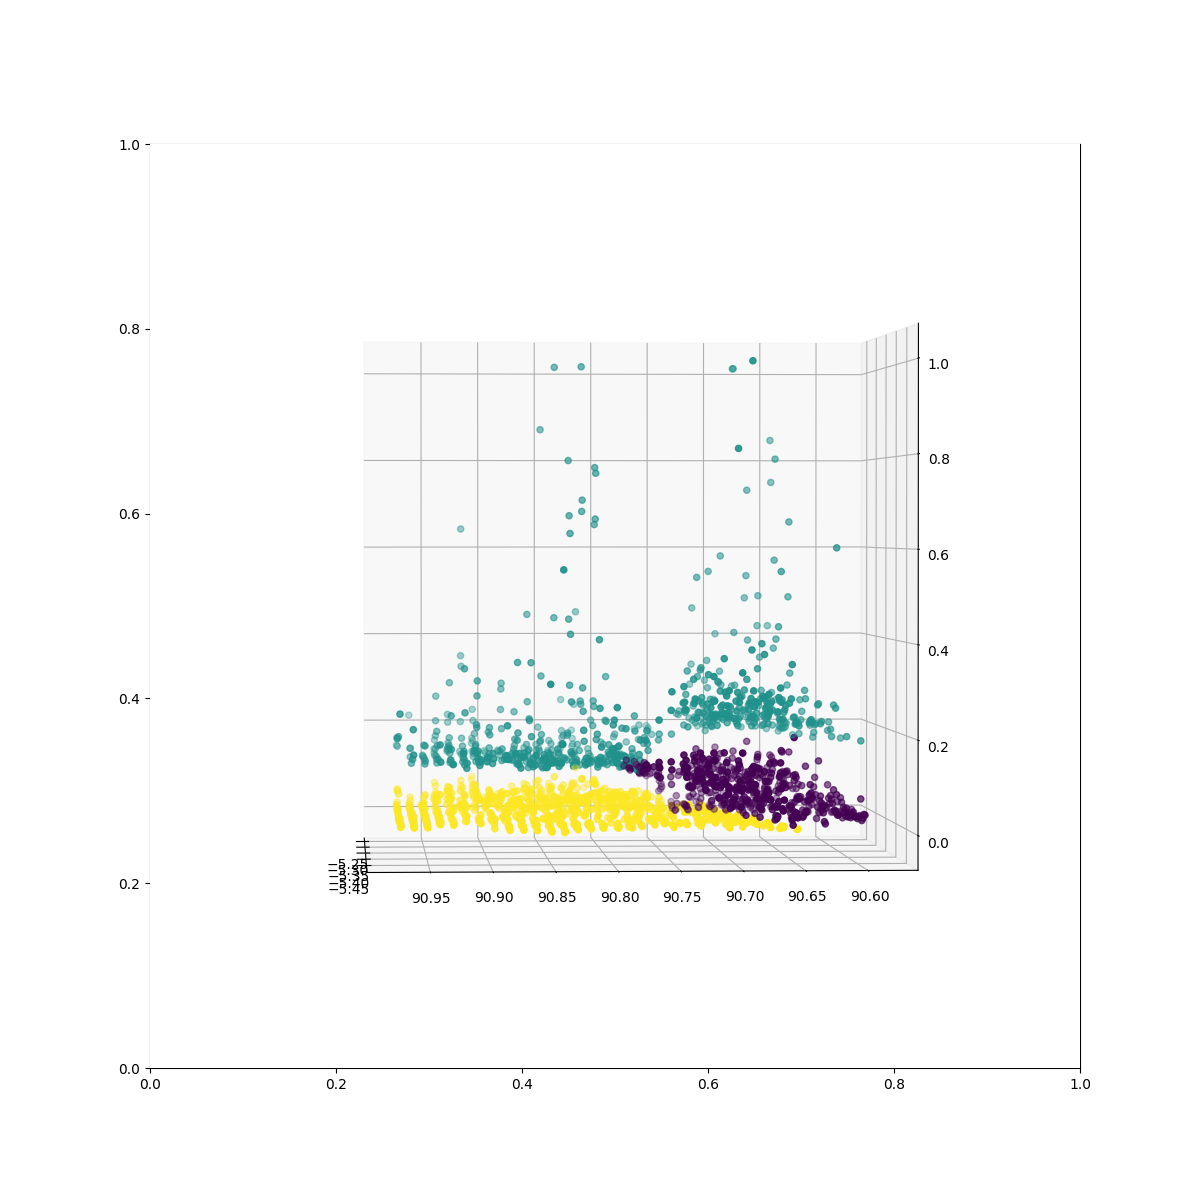

In [64]:
f, ax = plt.subplots(figsize=(12,12))
ax = f.add_subplot(111, projection='3d')

ax.scatter(
    _d.lat,
    _d.long,
    _d.demand,
    c=_d['cluster']
)
plt.show()

In [73]:
df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
df_sample['dow'] = df_sample.day.map(lambda x: (max(x, 0) - 6) % 7)

In [87]:
df_sample['hour_p7'] = (df_sample.hour + 7) % 24

<IPython.core.display.Javascript object>


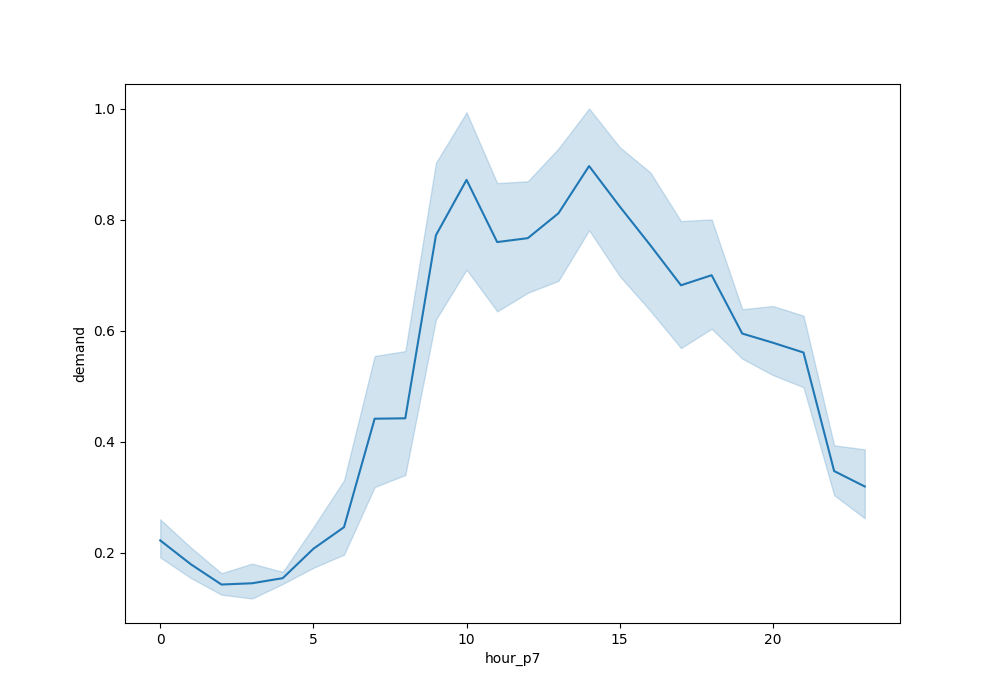

In [89]:
f, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(
    x='hour_p7',
    y='demand',
    data=df_sample[
        (df_sample.geohash6 == 'qp03xw') &
        (df_sample.is_weekend)
    ],
    ax=ax
)
plt.show()

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [99]:
ColumnTransformer(transformers=[
    ('1', OneHotEncoder(), ['cluster', 'hour', 'dow', 'minute', 'is_weekend'])
]).fit_transform(df_sample.head(20)).todense()

/home/arie/miniconda2/envs/data_analysis_351/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.

In [ ]:
regression_X_features = [
    'cluster',
    'cluster_prob',
    'is_weekend',
    'dow',
    'hour',
    'minute'
]

y_feature = 'demand'

X_train, X_test, y_train, y_test = train_test_split(
    df_sample[regression_X_features],
    df_sample[y_feature],
    test_size=0.3
)